# Part II - Prosper Loan Data
## by Providence Okechukwu



## Investigation Overview


> This presentation shows the results of the exploratory analysis of Prosper Loan Data investigating factors most responsible for the population of the Prosper Loan Data; why people apply for loans and what determines the loan amounts they have access to.  
 My key insight focuses more on the main features of interest: Prosperscore and ListingCategory. The listing category shows that the primary motivation for applying loans were debt consolidation. This suggested that many people requested loans to settle their short term debts or everyday bills while waiting to get enough to make a single bulk long term payment in form of the loan repayment.The prosperscore was a primary determinant in deciding what rates, APRs, loan amounts and terms people could benefit from. 

## Dataset Overview

> The original dataset contained 113937 records and 81 variables but my cleaned dataset contains 76224 loan records with 22 variables. Most variables are numeric in nature while the rest are of object, categorical and bool type.

The variables includes:

- ListingKey: Unique key for each listing
- ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.
- Term: The length of the loan expressed in months.
- LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, .
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.
- ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score. Applicable for loans originated after July 2009.
- Listing_category: The category of the listing that the borrower selected when posting their listing
- Occupation: The Occupation selected by the Borrower at the time they created the listing.
- EmploymentStatus:The employment status of the borrower at the time they posted the listing.
- IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- CreditScoreRangeLower: The lower value of the credit score range of borrower provided by credit agency
- CreditScoreRangeUpper: The upper value of the credit score range of borrower provided by credit agency
- DebtToIncomeRatio: debt/income. capped at 10.01
- IncomeRange: The income range of the borrower at the time the listing was created.
- IncomeVerifiable: Borrower provided documents to prove income
- LoanOriginalAmount: The origination amount of the loan.
- BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
- StatedMonthlyIncome:The monthly income the borrower stated at the time the listing was created.
- Recommendations: Number of recommendations the borrower had at the time of listing
- LoanOriginationYear: The date the loan was originated
- LoanOriginationMonth: The Month the loan was originated.


In [34]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [35]:
# load in the dataset into a pandas dataframe
loandata = pd.read_csv("loandata_cleaned.csv")
loandata.head(5)


,ListingKey,ListingNumber,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperScore,ListingCategory,BorrowerState,Occupation,...,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,Recommendations,LoanOriginationYear,LoanOriginationMonth
0,10273602499503308B223C1,1209647,36,Current,0.12016,0.0920,7,2,CO,Professional,...,680.0,699.0,0.18,"$50,000-74,999",True,6125.000000,10000,0,2014,Mar
1,0EF5356002482715299901A,658116,36,Current,0.12528,0.0974,9,16,GA,Skilled Labor,...,800.0,819.0,0.15,"$25,000-49,999",True,2875.000000,10000,0,2012,Nov
2,0F023589499656230C5E3E2,909464,36,Current,0.24614,0.2085,4,2,MN,Executive,...,680.0,699.0,0.26,"$100,000+",True,9583.333333,15000,0,2013,Sep
3,0F05359734824199381F61D,1074836,60,Current,0.15425,0.1314,10,1,NM,Professional,...,740.0,759.0,0.36,"$100,000+",True,8333.333333,15000,0,2013,Dec
4,0F0A3576754255009D63151,750899,36,Current,0.31032,0.2712,2,1,KS,Sales - Retail,...,680.0,699.0,0.27,"$25,000-49,999",True,2083.333333,3000,0,2013,Apr


## (Visualization 1)
This plot shows the count per listing category of the loan data. It gives us insight to the most popular reason for applying for a loan among those who were granted. From the investigation, Debt Consolidation has the highest count. Due to the vast difference in value, it is very likely that this had the highest count during initial application too.


In [36]:
#this is a dictionary of the categories to help decode the meaning of each number
category_dict=  {0:'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7: 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}    


x=list(category_dict.keys())
y=list(category_dict.values())

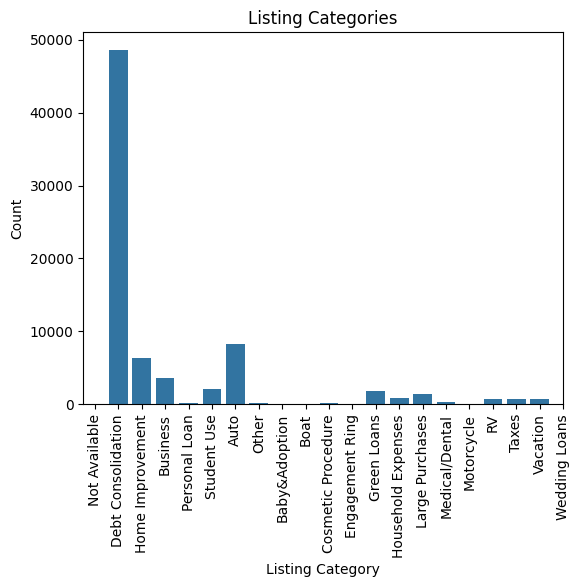

In [37]:
ax= plt.axes([.125, .125, .750, .775])

base_color= sns.color_palette()[0]
sns.countplot(data= loandata, x= 'ListingCategory',  color=base_color);
plt.xticks(x,y, rotation= 90)
plt.title('Listing Categories');
plt.title('Listing Categories');
plt.xlabel('Listing Category');
plt.ylabel('Count');

## (Visualization 2)

This plot shows that not being a home owner does stop you from obtaining a loan. However, being a home owner is associated with a high prosper score which oppurtunes you to high loan amounts and better loan rates.

Text(0.5, 1.0, 'Prosper Score Distribution by Home Ownership')

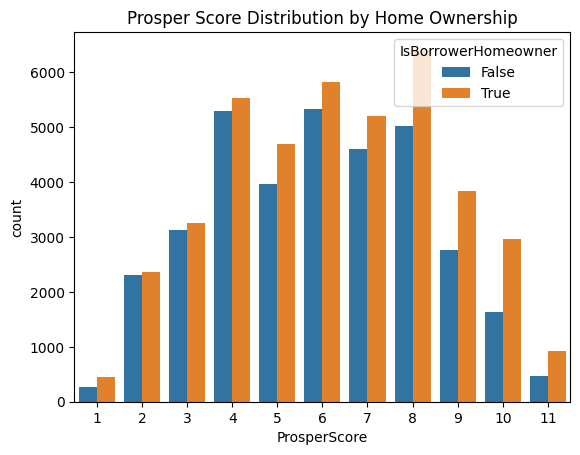

In [38]:
sns.countplot(data=loandata, x= 'ProsperScore', hue='IsBorrowerHomeowner');
plt.title('Prosper Score Distribution by Home Ownership')

In [39]:
plt.figure(figsize = [10,6]);

<Figure size 1000x600 with 0 Axes>

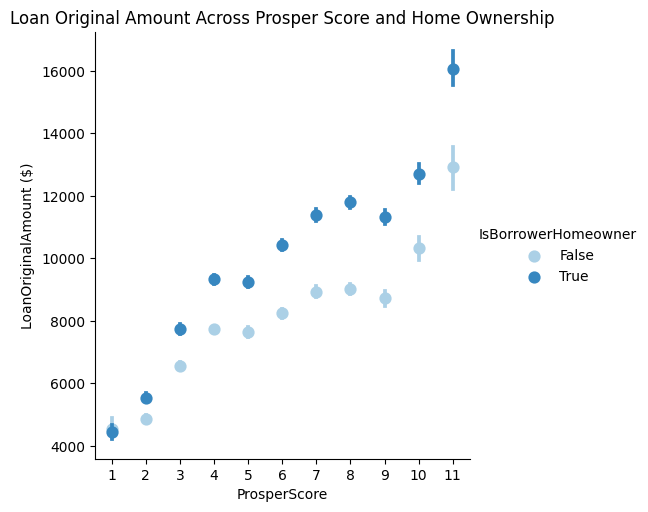

In [40]:

sns.catplot(data = loandata, x = 'ProsperScore', y = 'LoanOriginalAmount',kind='point', hue = 'IsBorrowerHomeowner',palette = 'Blues',join=False);
plt.title('Loan Original Amount Across Prosper Score and Home Ownership');
plt.ylabel('LoanOriginalAmount ($)');
plt.xlabel('ProsperScore');
plt.show();

## (Visualization 3)
This plot shows the relationship between stated monthly income and prosper score spread across different terms. It can be seen that people with high stated income were associated with a high prosper score and they had the highest ratio of the longest loan term. It can be deduced that this combination of high monthly income and high prosper score afforded the oppurtunity to get long term loans. 

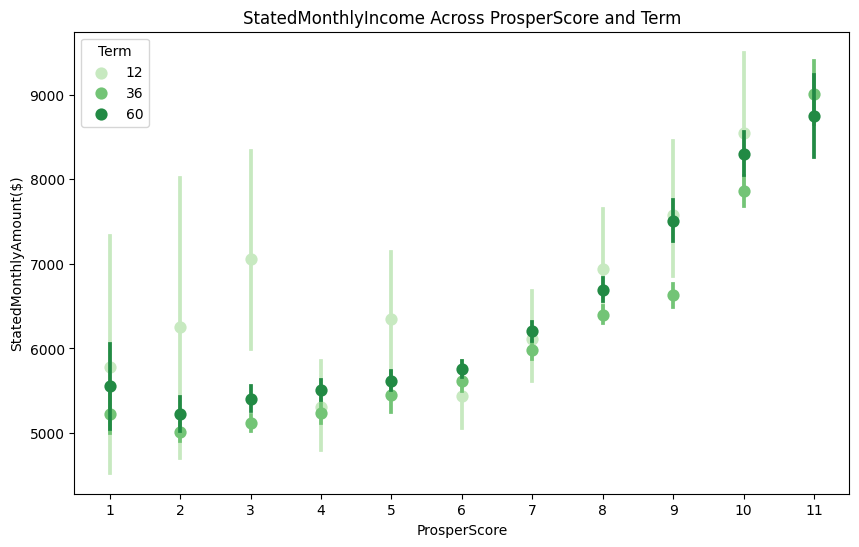

In [41]:
plt.figure(figsize = [10,6])
sns.pointplot(data = loandata, x = 'ProsperScore', y = 'StatedMonthlyIncome', hue = 'Term',
           palette = 'Greens', linestyles = '')
plt.title('StatedMonthlyIncome Across ProsperScore and Term')
plt.ylabel('StatedMonthlyAmount($)')
plt.xlabel('ProsperScore')
plt.show()

In [43]:
!python -m nbconvert Part_II_slide_deck_Prosper_loan_data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Prosper_loan_data.ipynb to slides
[NbConvertApp] Writing 776591 bytes to Part_II_slide_deck_Prosper_loan_data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2032.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.2032.0_x64__qbz5n2kfra8p0\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\nbconvert\__main__.py", line 3, in <module>
    main()
  File "C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packa